In [1]:
from art.attacks import ProjectedGradientDescent, PoisoningAttackSVM, SaliencyMapMethod, SpatialTransformation
import tensorflow as tf
import numpy as np
from art.utils import load_mnist
from matplotlib import pyplot as plt
from art.classifiers import KerasClassifier
from art.attacks import FastGradientMethod, ElasticNet

# load mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0, x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test[0:100]
y_test = y_test[0:100]



In [3]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test.shape

(100, 28, 28)

In [9]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(),
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

classifier = KerasClassifier(model=model, clip_values=(0, 1))

# attack_fgsm = FastGradientMethod(classifier=classifier)
# fgsm_test_adv = attack_fgsm.generate(x_test)b
# attack_elastic = ElasticNet(classifier=classifier)
# elastic_test_adv = attack_elastic.generate(x_test)


Epoch 1/3
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2900 - acc: 0.9149
Epoch 2/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1421 - acc: 0.9578
Epoch 3/3
100/100 [==============================] - 0s 381us/sample - loss: 0.0181 - acc: 1.0000
Accuracy on test data: 100.00%


In [10]:
attack_PGD = ProjectedGradientDescent(classifier=classifier)
test_PGD = attack_PGD.generate(x_test)


In [8]:
x_test_svc.shape

(100, 784)

In [12]:
# attack_PSVM = PoisoningAttackSVM(classifier=classifier)
#TypeError: __init__() missing 6 required positional arguments: 'step', 'eps', 'x_train', 'y_train', 'x_val', and 'y_val'


from art.classifiers.scikitlearn import ScikitlearnSVC
from sklearn.svm import SVC, LinearSVC

x_train_svc = x_train.reshape(-1, 28*28)
x_test_svc = x_test.reshape(-1, 28*28)
y_train = y_train.reshape(-1, 1)
model_svc = SVC()
# model2 = LinearSVC()


model_svc.fit(x_train_svc[:200], y_train[:200])
# model2.fit(x_train_svc[:100], y_train[:100])


classsifierSVC = ScikitlearnSVC(model=model_svc, clip_values=(0, 1))




attack_PSVM = PoisoningAttackSVM(classifier=classsifierSVC, eps=.3, step=.1, x_train=x_train_svc, y_train=y_train, x_val=x_test_svc[101:200], y_val=None)
test_PSVM = attack_PSVM.generate(x_test_svc)

/home/ao/Software/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ao/Software/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

In [11]:
print(y_test.shape)

(100,)


In [11]:


attack_SMM = SaliencyMapMethod(classifier=classifier)
test_SMM = attack_SMM.generate(x_test)


In [12]:
attack_STran = SpatialTransformation(classifier=classifier)
test_STran = attack_STran.generate(x_test)

In [7]:
test_PGD.shape

(100, 28, 28, 1)

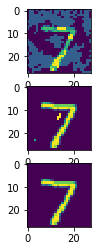

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
# ax4 = fig.add_subplot(314)

ax1.imshow(test_PGD[0].reshape(28, 28))
# ax2.imshow(test_PSVM[0])
ax2.imshow(test_SMM[0].reshape(28, 28))
ax3.imshow(test_STran[0].reshape(28, 28))
plt.show()

In [3]:
x_train.shape
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
x_test = x_test[0:100]
y_test = y_test[0:100]

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

classifier = KerasClassifier(model=model, clip_values=(0, 1))

# attack_fgsm = FastGradientMethod(classifier=classifier)
# fgsm_test_adv = attack_fgsm.generate(x_test)
# attack_elastic = ElasticNet(classifier=classifier)
# elastic_test_adv = attack_elastic.generate(x_test)


attack_PGD = ProjectedGradientDescent(classifier=classifier)
# attack_PSVM = PoisoningAttackSVM(classifier=classifier)
# attack_SMM = SaliencyMapMethod(classifier=classifier)
# attack_STran = SpatialTransformation(classifier=classifier)

test_PGD = attack_PGD.generate(x_test)




fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(test_PGD[0])
# ax2.imshow(elastic_test_adv[0])
plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(y_train[:10])

11493376/11490434 [==============================] - 1s 0us/step
[5 0 4 1 9 2 1 3 1 4]


In [9]:
from scipy.ndimage.interpolation import shift
import numpy as np

a = np.array([[1,2],[3,4]])

print(a)
       
shift(a,shift=[1, 0],cval=0)


[[1 2]
 [3 4]]


array([[0, 0],
       [1, 2]])

In [1]:
from sklearn.datasets import load_digits
# 从通过数据加载器获得手写体数字的数码图像数据并储存在digits变量中。
digits = load_digits()
# 检视数据规模和特征维度。
print (digits.data.shape)


(1797, 64)
